In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
X = df.drop(['label'],axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [4]:
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [5]:
df.shape

(20800, 5)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [7]:
df = df.dropna()
df.shape

(18285, 5)

In [8]:
messages = df.copy()

In [9]:
messages.reset_index(inplace=True)

In [10]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [11]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()


In [12]:
corpus=[]
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review =review.lower()
    review = review.split()
    
    review=[ps.stem(word) for word in review if not word in stopwords.words("english")]
    review=" ".join(review)
    corpus.append(review)

In [13]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [14]:
X.shape

(18285, 5000)

In [15]:
y=messages['label']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [38]:
cv.get_feature_names()[:10]

C:\Users\RAHUL SUTHAR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [39]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [40]:
count_df= pd.DataFrame(X,columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
def  plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix ,without normalization")
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

## MultinomialNB Algorithm

In [43]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [44]:
from sklearn import metrics
import itertools

Accuracy : 0.903
Confusion matrix ,without normalization


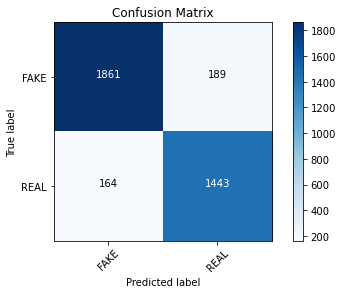

In [45]:
mnb.fit(X_train,y_train)
pred = mnb.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy : %0.3f"%score )
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

## Passive Aggressivr Classifier Algo

In [48]:
from sklearn.linear_model import PassiveAggressiveClassifier
liner_clf =PassiveAggressiveClassifier(n_iter_no_change=50)

Accuracy : 0.903
Confusion matrix ,without normalization


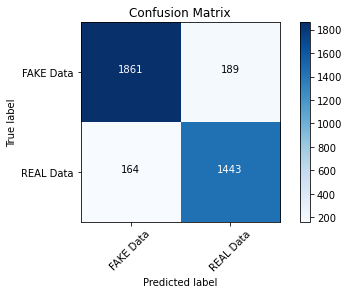

In [49]:
liner_clf.fit(X_train,y_train)
pred -liner_clf.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print("Accuracy : %0.3f"%score )
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE Data','REAL Data'])


  ### Multinomial classifier with Hyperparameter

In [70]:
classifier = MultinomialNB(alpha=0.1)

In [71]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier =MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    if score>previous_score:
        classifier =sub_classifier
        previous_score=score
    print("Alpha: {}, score: {}".format(alpha,score))

C:\Users\RAHUL SUTHAR\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.0, score: 0.8947224500957068
Alpha: 0.1, score: 0.904019688269073
Alpha: 0.2, score: 0.905386929176921
Alpha: 0.30000000000000004, score: 0.904019688269073
Alpha: 0.4, score: 0.9034727919059339
Alpha: 0.5, score: 0.9034727919059339
Alpha: 0.6000000000000001, score: 0.9037462400875034
Alpha: 0.7000000000000001, score: 0.904019688269073
Alpha: 0.8, score: 0.9037462400875034
Alpha: 0.9, score: 0.9034727919059339


In [72]:
feature_names = cv.get_feature_names()


C:\Users\RAHUL SUTHAR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
classifier.alpha

0.2

In [78]:
classifier.feature_log_prob_[0]

array([ -9.06337217,  -9.65473666, -10.69082859, ...,  -9.83062732,
       -13.08872386, -10.04420142])

In [80]:
sorted(zip(classifier.feature_log_prob_[0],feature_names),reverse=True)[:20]

[(-2.896829498057725, 'new'),
 (-2.9455896844107397, 'time'),
 (-2.949927059610882, 'york'),
 (-2.9501246607339002, 'new york'),
 (-2.9662614333819732, 'york time'),
 (-2.9662614333819732, 'new york time'),
 (-3.907194570238028, 'breitbart'),
 (-3.980305478109292, 'trump'),
 (-5.262280724904078, 'donald'),
 (-5.270293588289435, 'donald trump'),
 (-5.691775257739078, 'say'),
 (-6.014607044162729, 'obama'),
 (-6.014607044162729, 'clinton'),
 (-6.117055255634302, 'presid'),
 (-6.179969081044871, 'state'),
 (-6.184976602775493, 'attack'),
 (-6.200151400794728, 'report'),
 (-6.225965947308691, 'hous'),
 (-6.2364812913082135, 'brief'),
 (-6.319081883507589, 'hillari')]

In [83]:
sorted(zip(classifier.feature_log_prob_[0],feature_names),reverse=True)[:5000]

[(-2.896829498057725, 'new'),
 (-2.9455896844107397, 'time'),
 (-2.949927059610882, 'york'),
 (-2.9501246607339002, 'new york'),
 (-2.9662614333819732, 'york time'),
 (-2.9662614333819732, 'new york time'),
 (-3.907194570238028, 'breitbart'),
 (-3.980305478109292, 'trump'),
 (-5.262280724904078, 'donald'),
 (-5.270293588289435, 'donald trump'),
 (-5.691775257739078, 'say'),
 (-6.014607044162729, 'obama'),
 (-6.014607044162729, 'clinton'),
 (-6.117055255634302, 'presid'),
 (-6.179969081044871, 'state'),
 (-6.184976602775493, 'attack'),
 (-6.200151400794728, 'report'),
 (-6.225965947308691, 'hous'),
 (-6.2364812913082135, 'brief'),
 (-6.319081883507589, 'hillari'),
 (-6.402862913291732, 'kill'),
 (-6.402862913291732, 'even'),
 (-6.409124674515708, 'news'),
 (-6.409124674515708, 'brief new york'),
 (-6.409124674515708, 'brief new'),
 (-6.415425892592437, 'year'),
 (-6.415425892592437, 'hillari clinton'),
 (-6.441035486796762, 'bill'),
 (-6.4475416906195, 'russia'),
 (-6.487493741631215, '